### Optimize the power consumption of Zone 1 based on various environmental and meteorological factors in  Wellington, New-Zealand
 




##### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#regression models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

#metrics
from sklearn import metrics

#crossval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('City Power Consumption (1).csv')

In [3]:
df.head()

S no Temperature Humidity Wind Speed  general diffuse flows  diffuse flows  \
0     1       6.559     73.8      0.083                  0.051          0.119   
1     2       6.414     74.5      0.083                  0.070          0.085   
2     3       6.313     74.5       0.08                  0.062          0.100   
3     4       6.121       75      0.083                  0.091          0.096   
4     5       5.921     75.7      0.081                  0.048          0.085   

   Air Quality Index (PM)  Cloudiness   Power Consumption in A Zone  
0                   158.0           1                   34055.69620  
1                   159.0           1                   29814.68354  
2                   151.0           1                   29128.10127  
3                   151.0           1                   28228.86076  
4                   154.0           1                   27335.69620

##### Temperature: The temperature in Celsius at the specific location.
##### Humidity: The relative humidity percentage at the location. (g.m-3, i.e. units of grams of water vapor per cubic meter of air. )
##### Wind Speed: The speed of the wind at the location. (nautical mile per hour )
##### General Diffuse Flows: Refer to a specific measurement or calculation related to the amount or intensity of diffuse solar radiation in a particular area. (Mtr sqr per sec )
##### Diffuse Flows: The measure of diffuse solar radiation. (Mtr sqr per sec )
##### Air Quality Index: An index representing the air quality in the area. (particles in micrograms per cubic meter. )
##### Cloudiness: The level of cloud cover or cloudiness at the location. (1-Yes,0-No)
##### Zone 1 Power Consumption: The power consumption in the specific zone, which is the target variable to be predicted. (in KWR- Target value)

In [4]:
df.tail()

S no Temperature Humidity Wind Speed  general diffuse flows  \
52578  52579         NaN     75.6      0.094                  436.2   
52579  52580         NaN     73.5      0.089                  451.6   
52580  52581         NaN     70.1      0.085                  466.4   
52581  52582         NaN    67.75      0.086                  477.0   
52582  52583         NaN    66.24      0.088                  485.7   

       diffuse flows  Air Quality Index (PM)  Cloudiness  \
52578          38.96                   157.0           0   
52579          37.73                   157.0           0   
52580          37.49                   157.0           0   
52581          37.37                   152.0           0   
52582          36.72                   155.0           0   

        Power Consumption in A Zone  
52578                   34444.55696  
52579                   34438.48101  
52580                   33873.41772  
52581                   33988.86076  
52582                   34158.98734

In [5]:
df.describe()

S no  general diffuse flows  diffuse flows  \
count  52583.000000           52275.000000   52568.000000   
mean   26292.000000             182.964247      74.872330   
std    15179.548939             264.571351     124.084858   
min        1.000000               0.004000       0.011000   
25%    13146.500000               0.062000       0.122000   
50%    26292.000000               5.226000       4.412000   
75%    39437.500000             320.100000     100.500000   
max    52583.000000            1163.000000     936.000000   

       Air Quality Index (PM)    Cloudiness   Power Consumption in A Zone  
count            52565.000000  52583.000000                  52583.000000  
mean               154.499191      0.009338                  31061.821779  
std                  2.871553      0.096180                   8021.057455  
min                150.000000      0.000000                   9457.750760  
25%                152.000000      0.000000                  24738.858990  
50%                155.000000      0.000000                  31189.787230  
75%                157.000000      0.000000                  36721.582445  
max                159.000000      1.000000                  52204.395120

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


### Handling Missing Values

In [7]:
df.isnull().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [8]:
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage

S no                            0.000000
Temperature                     0.608562
Humidity                        0.047544
Wind Speed                      0.135025
general diffuse flows           0.585741
diffuse flows                   0.028526
Air Quality Index (PM)          0.034232
Cloudiness                      0.000000
 Power Consumption in A Zone    0.000000
dtype: float64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

S no                            0
Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

### Handling Duplicated Values 

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(52145, 9)

### dropping unecessary column

In [14]:
df.drop('S no', inplace=True, axis=1)

### String Manipulation

In [15]:
",    ".join(map(str, df['Humidity'].unique()))

'73.8,    74.5,    75,    75.7,    76.9,    77.7,    78.2,    78.1,    77.3,    77.5,    76.7,    78.6,    78.8,    78.9,    79.1,    79.7,    78.5,    77.9,    77.2,    76.6,    76.2,    74.4,    74.1,    71.9,    74,    74.2,    72.9,    75.8,    73.5,    78.3,    74.3,    75.6,    73.7,    77,    76,    74.6,    72.3,    72.2,    71,    72,    73.1,    74.8,    71.8,    74.7,    71.3,    69.85,    68.81,    68.01,    66.14,    64.21,    61.9,    59.3,    56.03,    53.52,    53.26,    54.36,    54.42,    56.46,    58.7,    59.23,    58.06,    59.33,    58.6,    55.29,    52.45,    54.99,    56.66,    55.86,    58.8,    57.73,    58.23,    59.07,    59,    59.53,    60.83,    61.87,    63.27,    63.94,    64.87,    66.11,    66.74,    66.71,    68.35,    70.2,    70.7,    70.6,    71.2,    71.1,    69.82,    69.98,    70.1,    68.78,    65.44,    63.84,    63.97,    66.77,    68.04,    69.18,    69.94,    70.8,    79.2,    79.3,    78.4,    79.8,    81.3,    80,    75.2,    77.4,    7

#### '84.8 i'  value observed in humidity column here we need to do string manupulation

In [16]:
df['Humidity'] = [float(item.split()[0]) for item in df['Humidity'].astype(str)]

In [17]:
",   ".join(map(str, df['Temperature'].unique()))

'6.559,   6.414,   6.313,   6.121,   5.921,   5.853,   5.641,   5.496,   5.678,   5.491,   5.516,   5.471,   5.059,   4.968,   4.975,   4.897,   5.02,   5.407,   5.169,   5.081,   5.041,   5.034,   4.896,   4.805,   4.753,   4.901,   5.203,   5.394,   5.156,   5.179,   4.934,   4.718,   5.546,   4.658,   4.382,   4.212,   4.308,   4.735,   4.769,   4.92,   4.408,   4.29,   4.304,   4.513,   4.489,   4.356,   4.478,   4.583,   4.794,   4.807,   4.757,   4.509,   4.346,   4.704,   4.624,   4.629,   4.599,   4.524,   4.575,   5.124,   5.836,   5.996,   6.22,   6.703,   6.993,   7.54,   8.22,   9.49,   10.65,   11.06,   12.4,   13.08,   14.38,   15.02,   15.55,   15.56,   15.49,   15.57,   15.65,   15.73,   15.68,   15.7,   15.75,   15.83,   15.79,   15.72,   15.53,   15.48,   15.47,   15.44,   15.35,   15.34,   15.11,   14.93,   14.71,   14.48,   14.29,   14.09,   13.89,   13.79,   13.54,   12.51,   12.06,   11.75,   11.61,   11.5,   11.43,   11.42,   11.69,   12.05,   11.87,   11.29,   1

In [18]:
df['Temperature'] = [float(item.split()[0]) for item in df['Temperature'].astype(str)]

#### '13.65 CD' , '5.488 dc' these values observed in Temperature column need to be string manupulation

In [19]:
",  ".join(map(str, df['Wind Speed'].unique()))

'0.083,  0.08,  0.081,  0.085,  0.082,  0.084,  0.079,  8.50%,  0.076,  2.66,  4.93,  4.924,  4.923,  4.918,  4.916,  2.451,  0.077,  0.074,  0.075,  0.086,  0.078,  0.072,  0.073,  0.071,  0.087,  0.09,  0.088,  0.091,  0.089,  0.094,  0.069,  0.092,  2.287,  4.708,  1.97,  0.14,  0.093,  0.097,  0.095,  0.106,  0.098,  0.1,  0.099,  0.096,  0.068,  0.07,  0.067,  0.066,  0.065,  0.295,  2.981,  4.917,  4.914,  4.915,  0.907,  4.913,  4.921,  4.353,  0.464,  4.919,  4.92,  1.437,  1.324,  0.245,  0.805,  4.912,  3.725,  1.682,  4.922,  4.911,  4.926,  4.925,  4.91,  4.909,  4.908,  4.928,  0.653,  1.026,  4.927,  4.907,  3.982,  0.111,  1.236,  4.65,  2.764,  4.906,  4.905,  4.904,  4.929,  4.797,  0.102,  0.108,  0.932,  3.627,  1.966,  2.54,  0.118,  0.117,  0.119,  0.107,  0.116,  0.127,  0.105,  0.062,  1.055,  4.405,  0.139,  0.561,  0.555,  0.865,  0.449,  0.271,  0.421,  0.263,  0.437,  0.642,  0.18,  0.258,  0.101,  0.064,  2.654,  3.076,  0.063,  0.061,  0.058,  0.057,  0.053

####  '8.50%' mismatched valu observed in Wind Speed column 

In [20]:
df['Wind Speed'] = df['Wind Speed'].astype(str).str.replace('%', '').astype(float)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52145 entries, 0 to 52415
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   52145 non-null  float64
 1   Humidity                      52145 non-null  float64
 2   Wind Speed                    52145 non-null  float64
 3   general diffuse flows         52145 non-null  float64
 4   diffuse flows                 52145 non-null  float64
 5   Air Quality Index (PM)        52145 non-null  float64
 6   Cloudiness                    52145 non-null  int64  
 7    Power Consumption in A Zone  52145 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.6 MB


In [22]:
df.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52145.000000  52145.000000  52145.000000           52145.000000   
mean      18.840984     68.238597      1.969080             182.861960   
std        5.810479     15.571295      2.351476             264.757717   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.430000     58.270000      0.078000               0.062000   
50%       18.840000     69.850000      0.086000               4.987000   
75%       22.920000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      8.500000            1163.000000   

       diffuse flows  Air Quality Index (PM)    Cloudiness  \
count   52145.000000            52145.000000  52145.000000   
mean       75.195083              154.499530      0.007038   
std       124.433309                2.872062      0.083598   
min         0.011000              150.000000      0.000000   
25%         0.122000              152.000000      0.000000   
50%         4.411000              155.000000      0.000000   
75%       101.300000              157.000000      0.000000   
max       936.000000              159.000000      1.000000   

        Power Consumption in A Zone  
count                  52145.000000  
mean                   31112.183719  
std                     8008.047631  
min                     9457.750760  
25%                    24804.551420  
50%                    31236.196720  
75%                    36763.076920  
max                    52204.395120

### Checking Outliers

Temperature


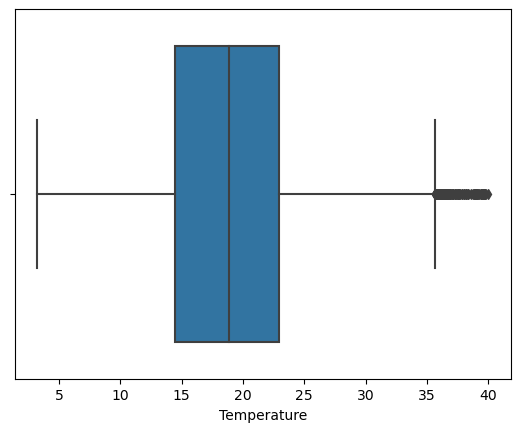

Humidity


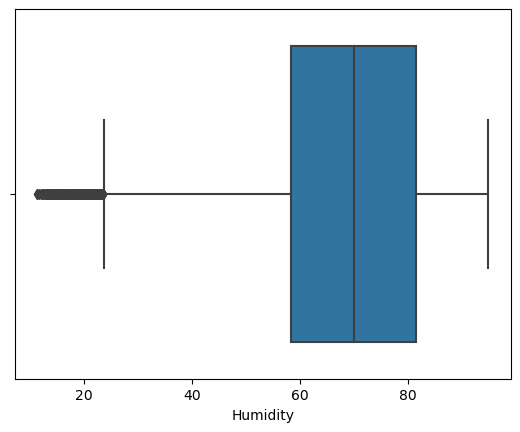

Wind Speed


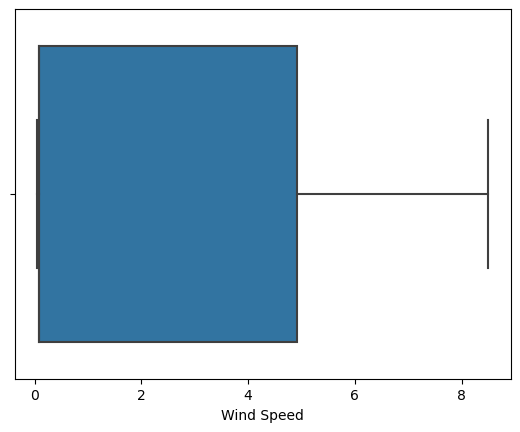

general diffuse flows


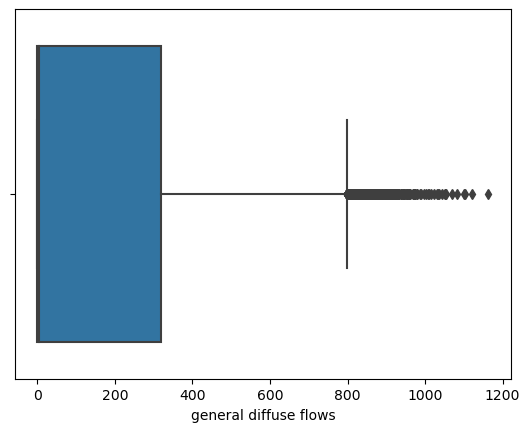

diffuse flows


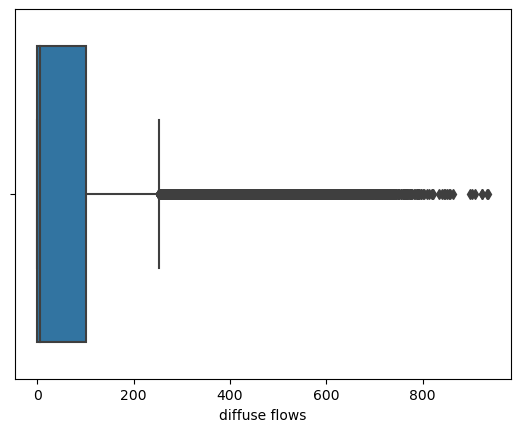

Air Quality Index (PM)


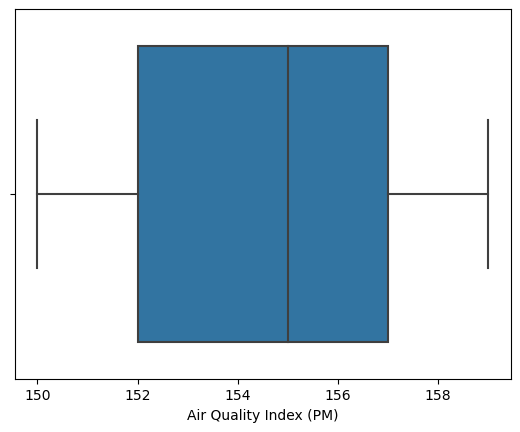

Cloudiness


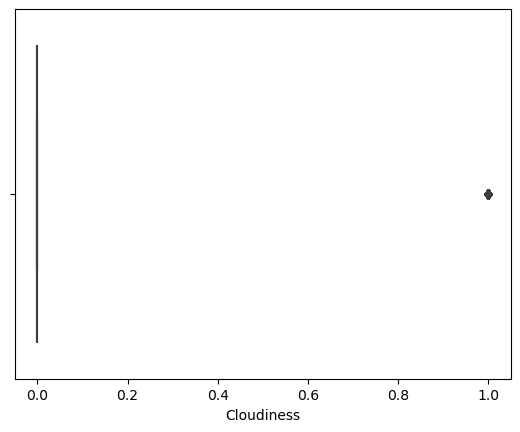

 Power Consumption in A Zone


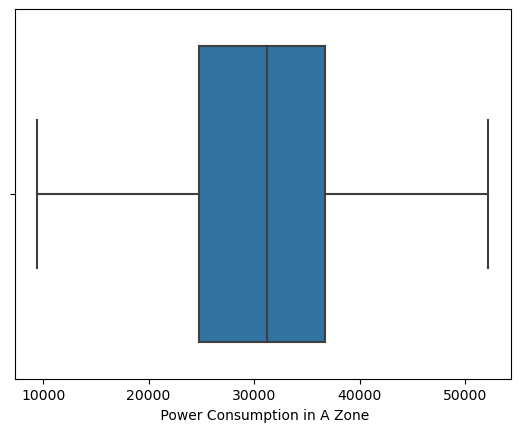

In [116]:
for i in (df.select_dtypes(include=['number'])):
    print(i)
    sns.boxplot(df[i])
    plt.show()
    

In [24]:
#Temperature, Humididty, general Diffuse flow, diffuss flow are having outliers.

### Checking Distribution of All Columns

Temperature


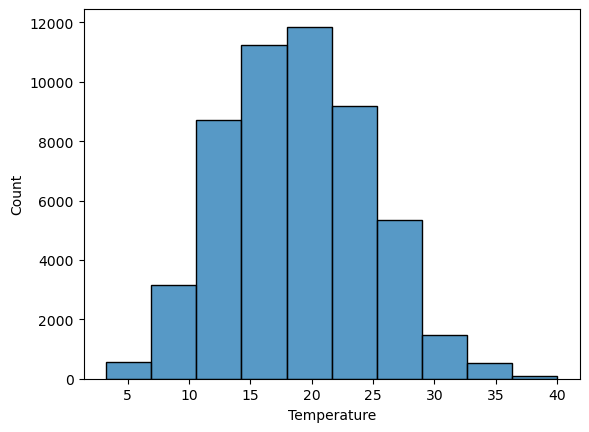

Humidity


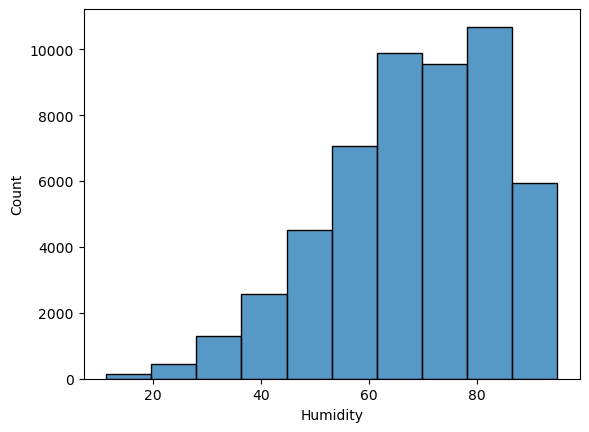

Wind Speed


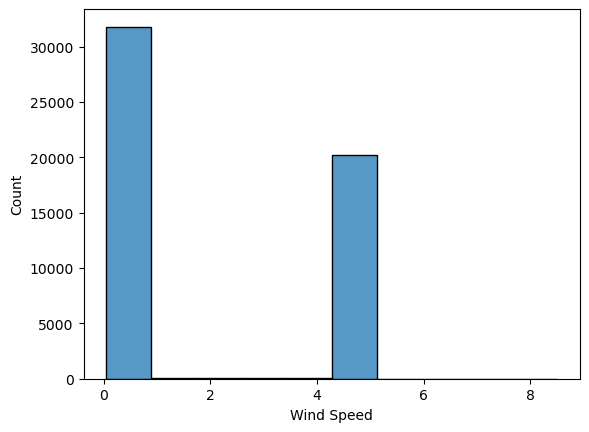

general diffuse flows


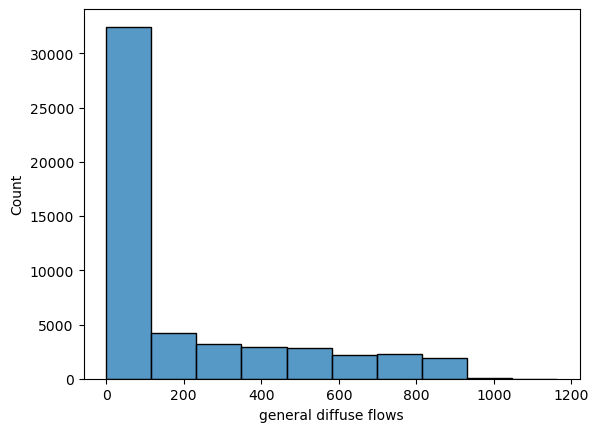

diffuse flows


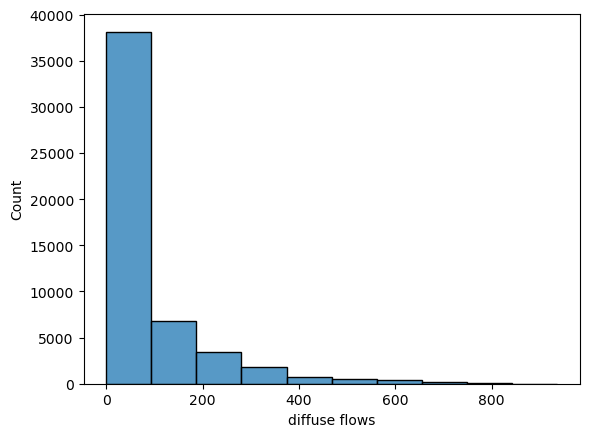

Air Quality Index (PM)


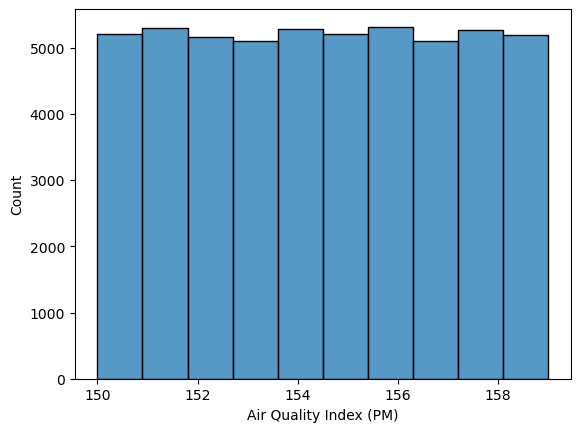

Cloudiness


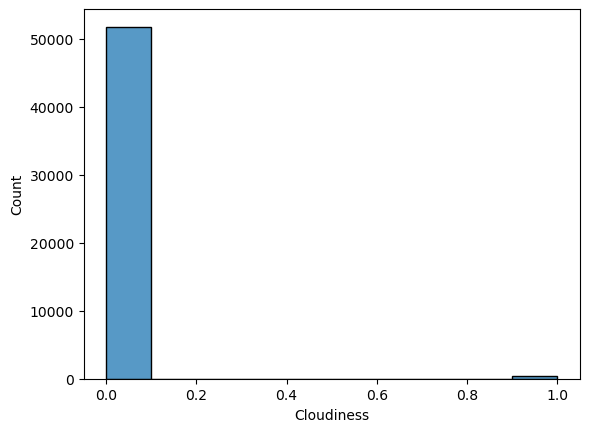

 Power Consumption in A Zone


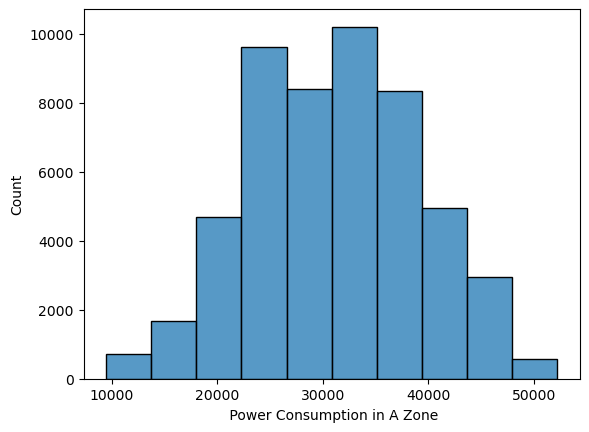

In [25]:
for i in df.columns:
    print(i)
    sns.histplot(df[i], bins=10)
    plt.show()

### Handling Outliers 

In [26]:
df1=df.copy()
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
Upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [27]:
print(f'Upper_limit\n',Upper_limit)

Upper_limit
 Temperature                        35.65500
Humidity                          116.09500
Wind Speed                         12.17050
general diffuse flows             798.90700
diffuse flows                     253.06700
Air Quality Index (PM)            164.50000
Cloudiness                          0.00000
 Power Consumption in A Zone    54700.86517
dtype: float64


In [28]:
print(f'lower_limit\n',lower_limit)

lower_limit
 Temperature                        1.69500
Humidity                          23.57500
Wind Speed                        -7.17750
general diffuse flows           -479.24500
diffuse flows                   -151.64500
Air Quality Index (PM)           144.50000
Cloudiness                         0.00000
 Power Consumption in A Zone    6866.76317
dtype: float64


In [29]:
df1['Temperature']= np.where(df1['Temperature'] <1.69500,1.69500 , np.where(df1['Temperature'] > 35.65500, 35.65500, df1['Temperature']))
df1['Humidity']= np.where(df1['Humidity'] <23.57500,23.57500, np.where(df1['Humidity'] > 116.09500, 116.09500, df1['Humidity']))
df1['general diffuse flows']= np.where(df1['general diffuse flows'] <-479.24500,-479.24500 , np.where(df1['general diffuse flows'] >798.90700, 798.90700, df1['general diffuse flows']))
df1['diffuse flows']= np.where(df1['diffuse flows'] <-151.64500,-151.64500 , np.where(df1['diffuse flows'] > 253.06700, 253.06700, df1['diffuse flows']))


In [30]:
df1.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52145.000000  52145.000000  52145.000000           52145.000000   
mean      18.837221     68.264676      1.969080             180.289052   
std        5.798740     15.490352      2.351476             258.266580   
min        3.247000     23.575000      0.050000               0.004000   
25%       14.430000     58.270000      0.078000               0.062000   
50%       18.840000     69.850000      0.086000               4.987000   
75%       22.920000     81.400000      4.915000             319.600000   
max       35.655000     94.800000      8.500000             798.907000   

       diffuse flows  Air Quality Index (PM)    Cloudiness  \
count   52145.000000            52145.000000  52145.000000   
mean       62.326509              154.499530      0.007038   
std        85.307301                2.872062      0.083598   
min         0.011000              150.000000      0.000000   
25%         0.122000              152.000000      0.000000   
50%         4.411000              155.000000      0.000000   
75%       101.300000              157.000000      0.000000   
max       253.067000              159.000000      1.000000   

        Power Consumption in A Zone  
count                  52145.000000  
mean                   31112.183719  
std                     8008.047631  
min                     9457.750760  
25%                    24804.551420  
50%                    31236.196720  
75%                    36763.076920  
max                    52204.395120

In [31]:
df.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52145.000000  52145.000000  52145.000000           52145.000000   
mean      18.840984     68.238597      1.969080             182.861960   
std        5.810479     15.571295      2.351476             264.757717   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.430000     58.270000      0.078000               0.062000   
50%       18.840000     69.850000      0.086000               4.987000   
75%       22.920000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      8.500000            1163.000000   

       diffuse flows  Air Quality Index (PM)    Cloudiness  \
count   52145.000000            52145.000000  52145.000000   
mean       75.195083              154.499530      0.007038   
std       124.433309                2.872062      0.083598   
min         0.011000              150.000000      0.000000   
25%         0.122000              152.000000      0.000000   
50%         4.411000              155.000000      0.000000   
75%       101.300000              157.000000      0.000000   
max       936.000000              159.000000      1.000000   

        Power Consumption in A Zone  
count                  52145.000000  
mean                   31112.183719  
std                     8008.047631  
min                     9457.750760  
25%                    24804.551420  
50%                    31236.196720  
75%                    36763.076920  
max                    52204.395120

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52145 entries, 0 to 52415
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   52145 non-null  float64
 1   Humidity                      52145 non-null  float64
 2   Wind Speed                    52145 non-null  float64
 3   general diffuse flows         52145 non-null  float64
 4   diffuse flows                 52145 non-null  float64
 5   Air Quality Index (PM)        52145 non-null  float64
 6   Cloudiness                    52145 non-null  int64  
 7    Power Consumption in A Zone  52145 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.6 MB


Temperature


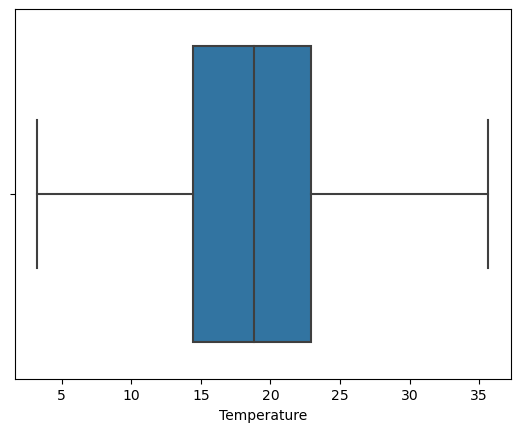

Humidity


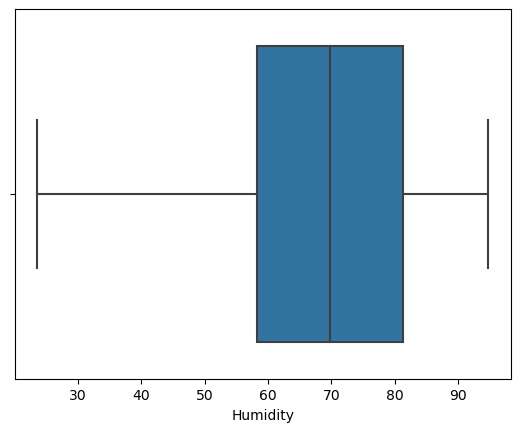

Wind Speed


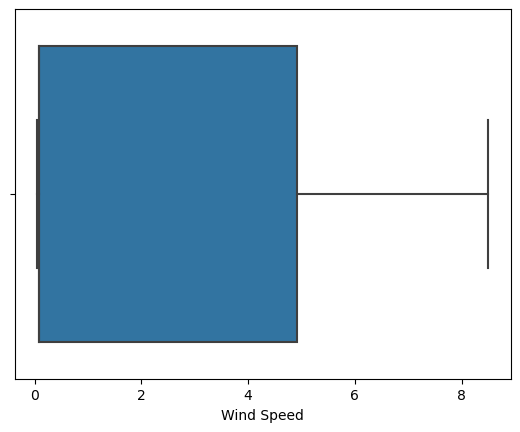

general diffuse flows


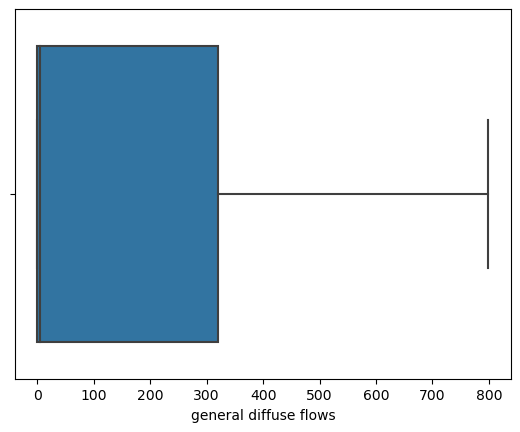

diffuse flows


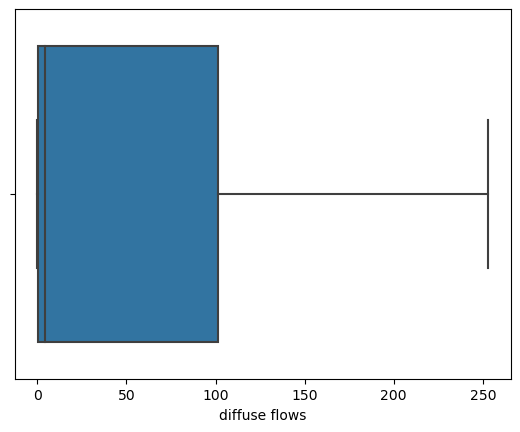

Air Quality Index (PM)


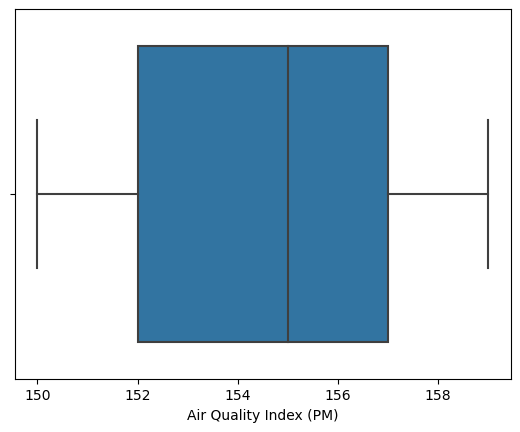

Cloudiness


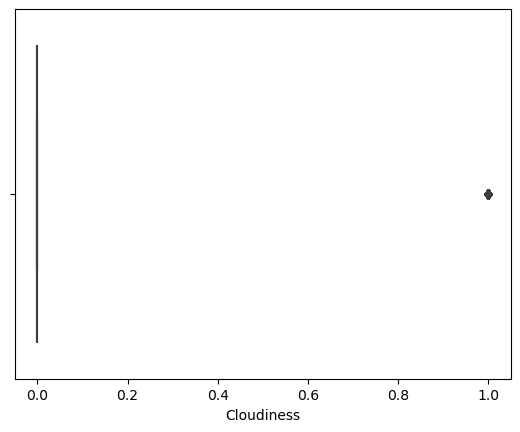

 Power Consumption in A Zone


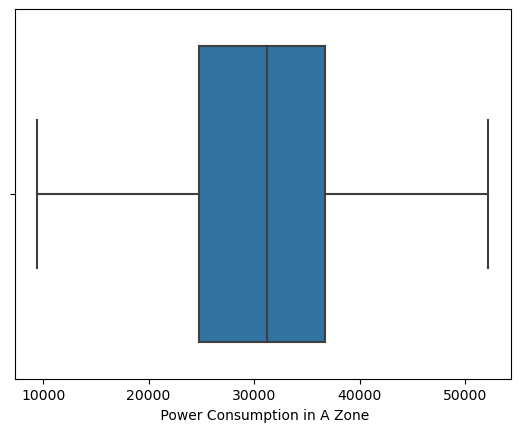

In [33]:
for i in df1.columns:
    print(i)
    sns.boxplot(df1[i])
    plt.show()

### Data Visualization

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Temperature'),
  Text(1.5, 0, 'Humidity'),
  Text(2.5, 0, 'Wind Speed'),
  Text(3.5, 0, 'general diffuse flows'),
  Text(4.5, 0, 'diffuse flows'),
  Text(5.5, 0, 'Air Quality Index (PM)'),
  Text(6.5, 0, 'Cloudiness'),
  Text(7.5, 0, ' Power Consumption in A Zone')])

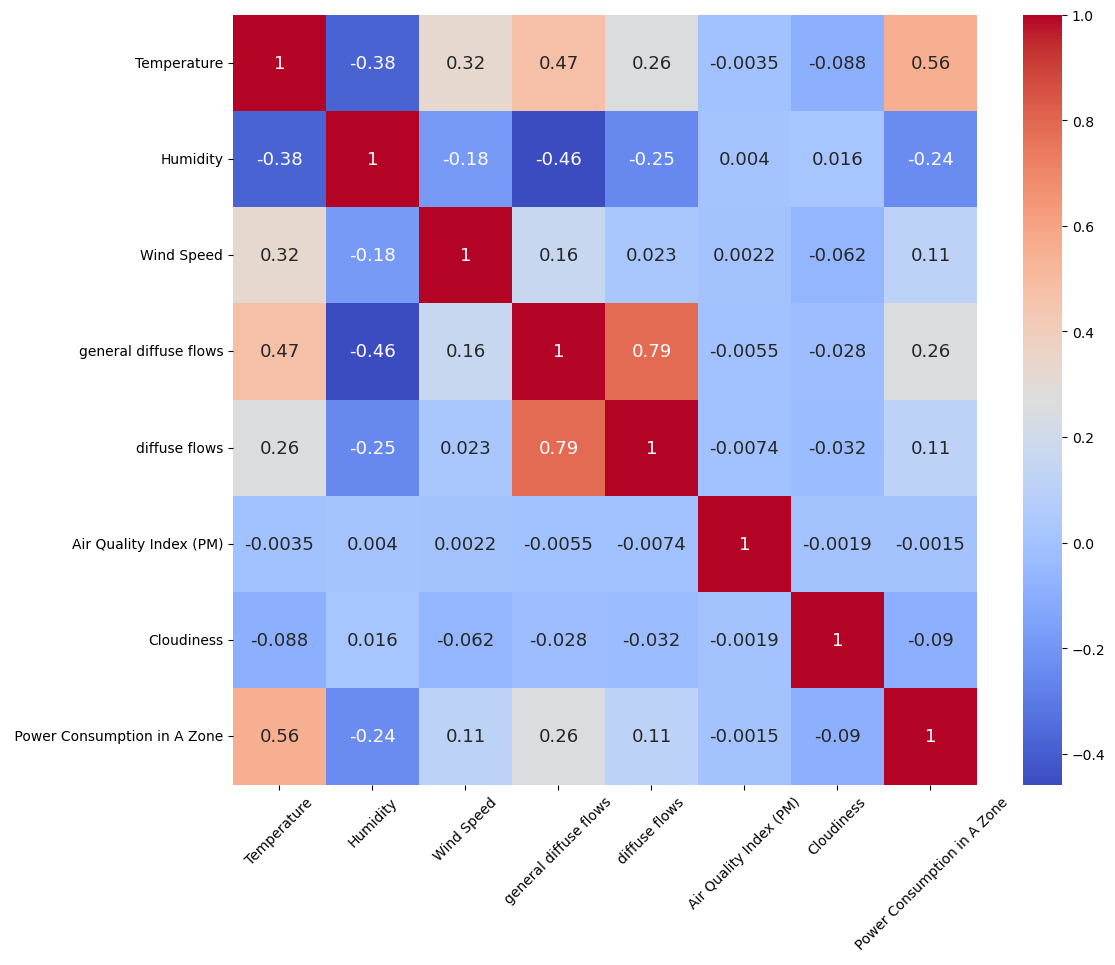

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(method='spearman'), annot=True, cmap='coolwarm',annot_kws={"size": 13})
plt.xticks(rotation=45)

In [35]:
# Temperature is having positive relashioship between power consumtion ratio, humidity, general diffuse flow, windspeed.
# negative relashioship between humidity and general diffuse flow.
# positive relashioship between diffuse flow and general diffuse flow.

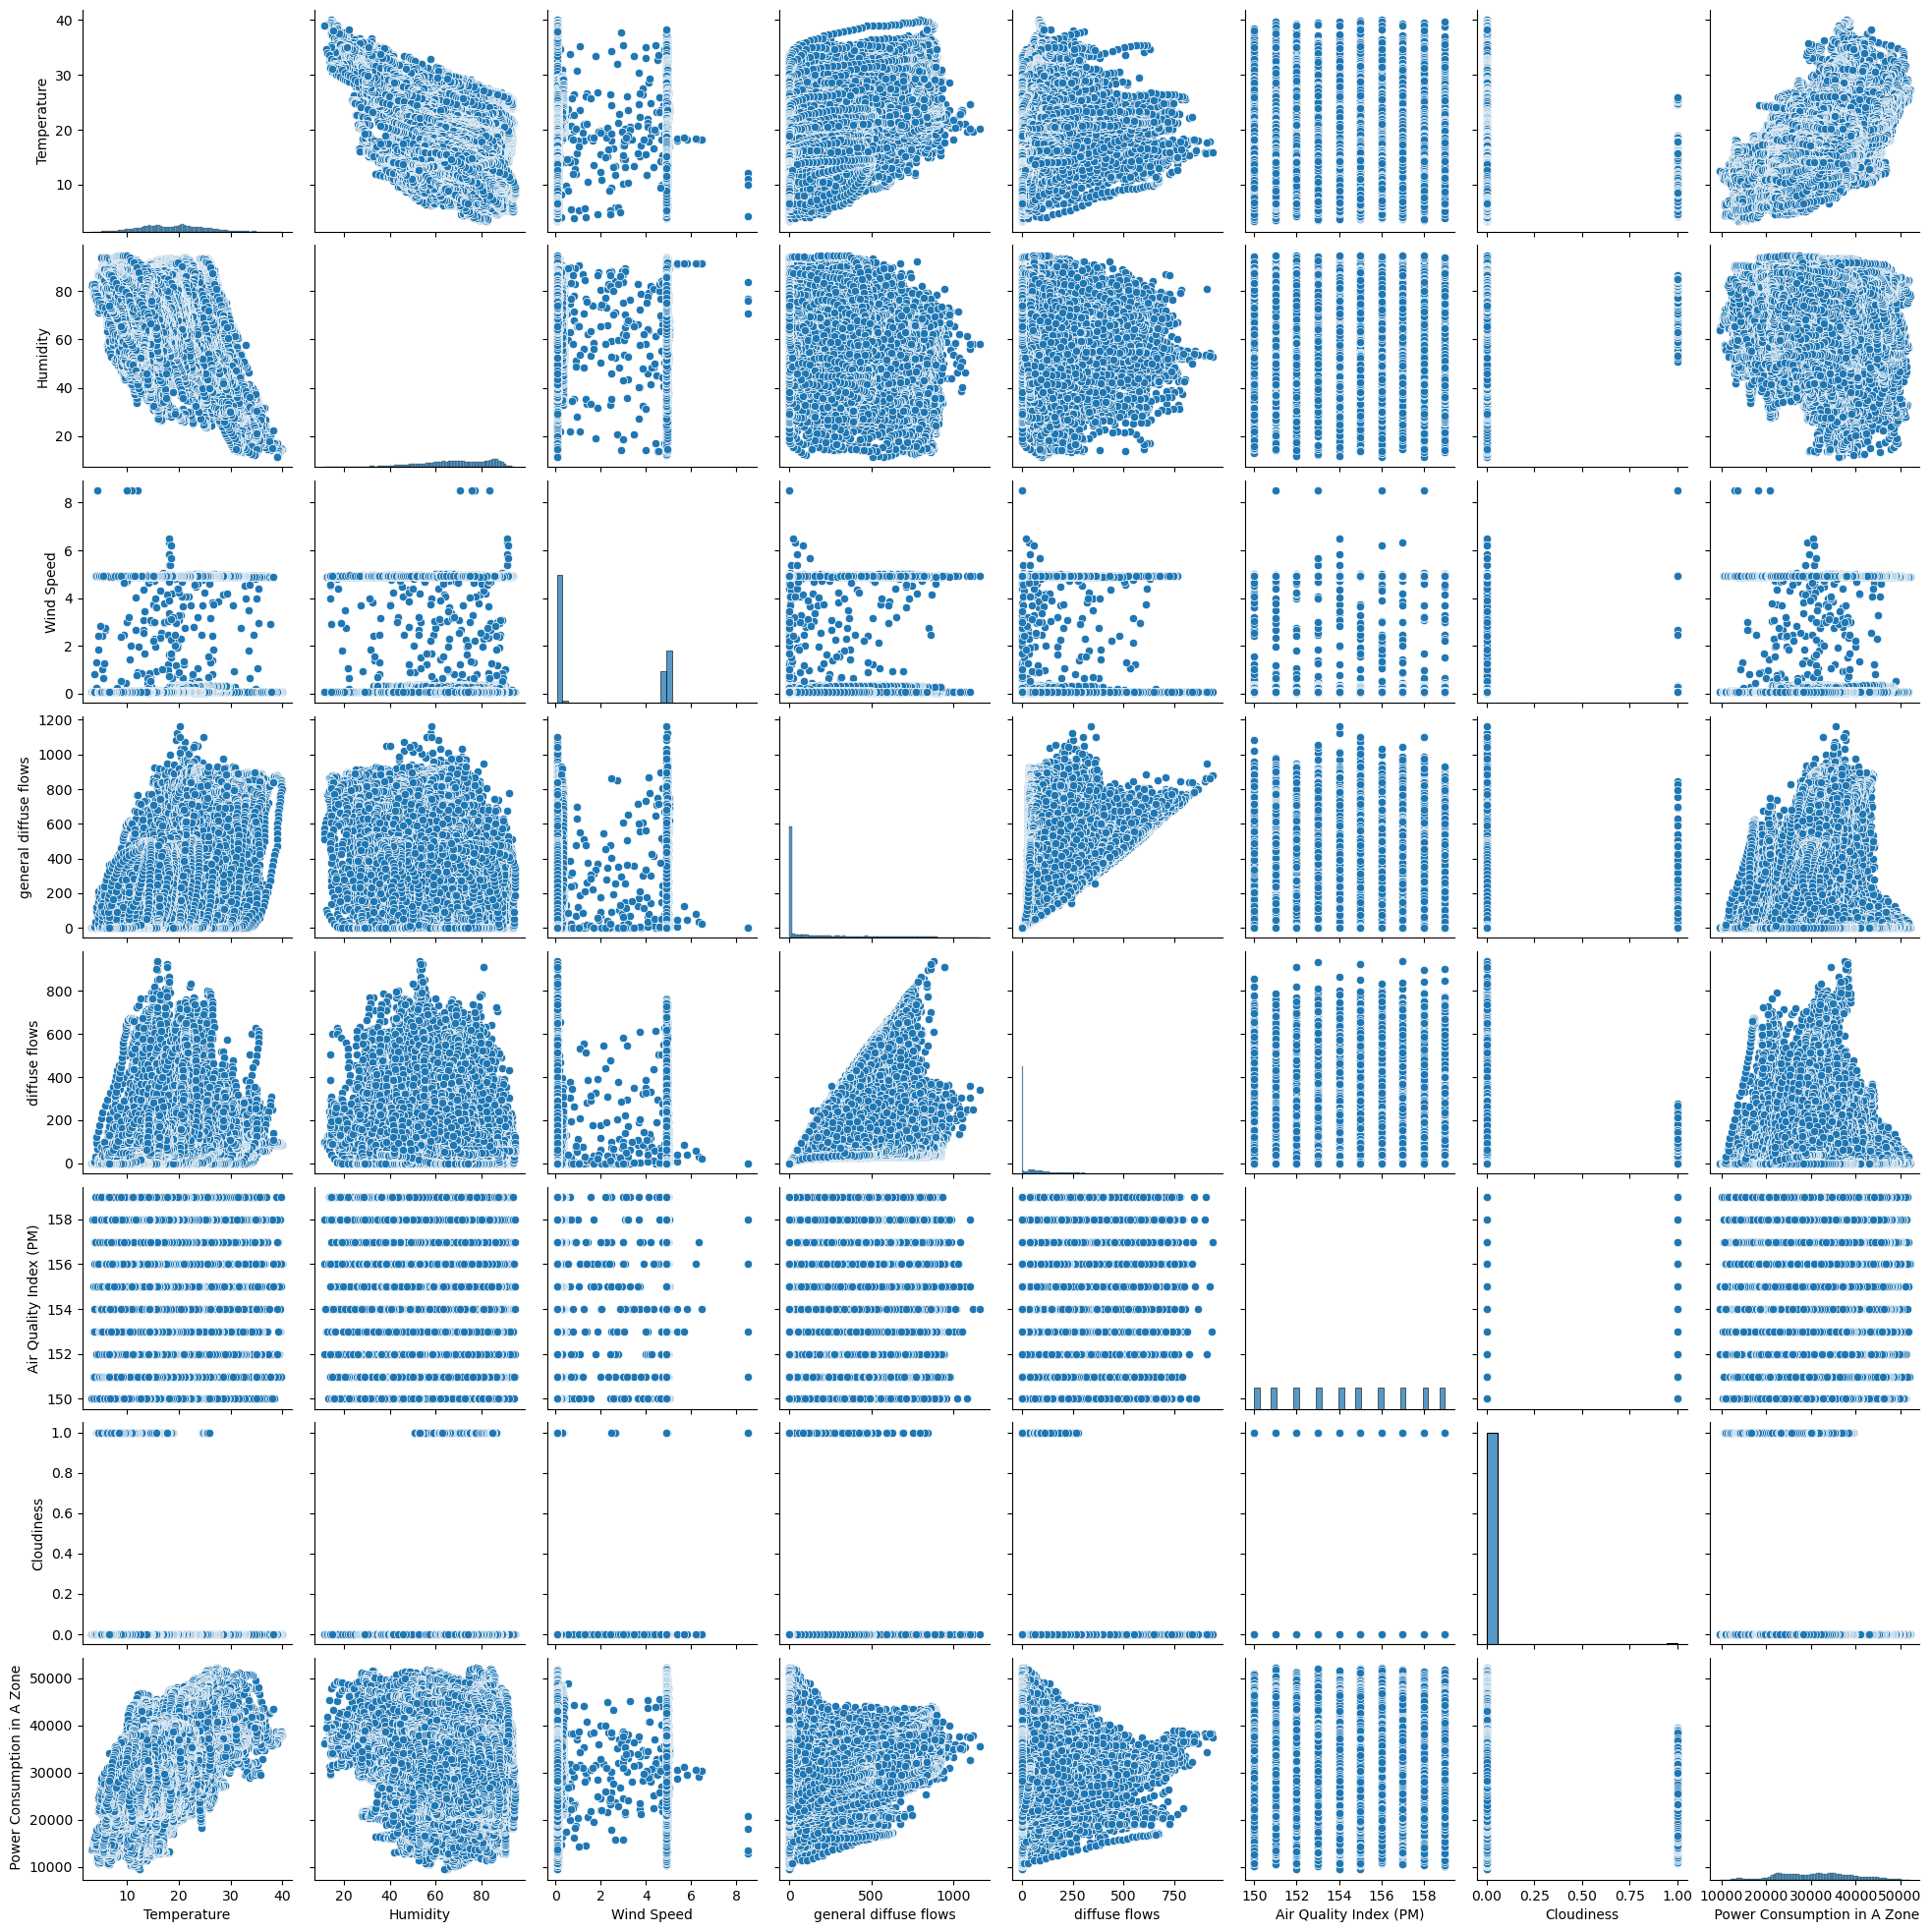

In [36]:
sns.pairplot(df)

<AxesSubplot:xlabel='Cloudiness', ylabel=' Power Consumption in A Zone'>

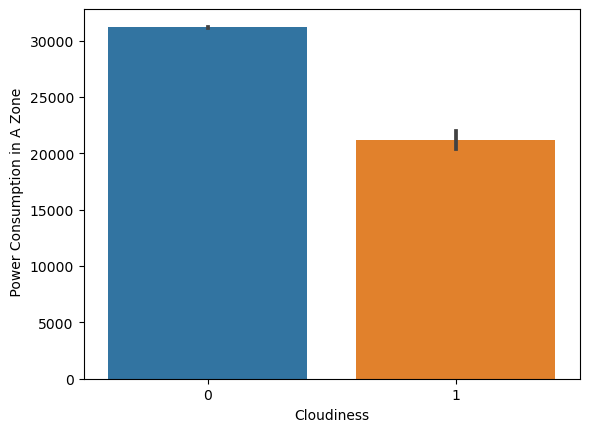

In [37]:
sns.barplot(x='Cloudiness', y=' Power Consumption in A Zone', data=df1)

In [38]:
## The plot indicates that power consumption is higher when the sky is clear due to may sunny weather or high temperature

<AxesSubplot:xlabel='Cloudiness', ylabel='Temperature'>

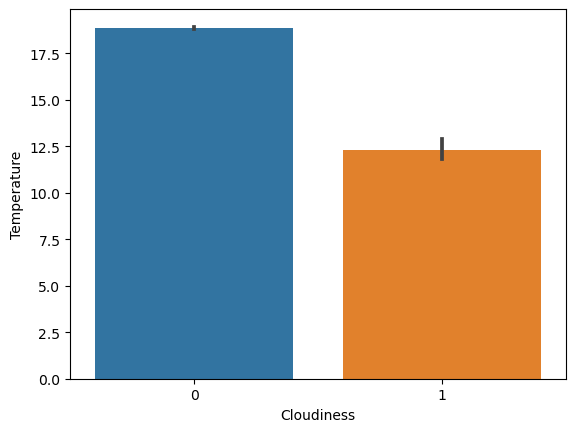

In [39]:
sns.barplot(x='Cloudiness', y='Temperature', data=df1)

In [40]:
## Higher the temperature when sky is clear.

<AxesSubplot:xlabel='Temperature', ylabel=' Power Consumption in A Zone'>

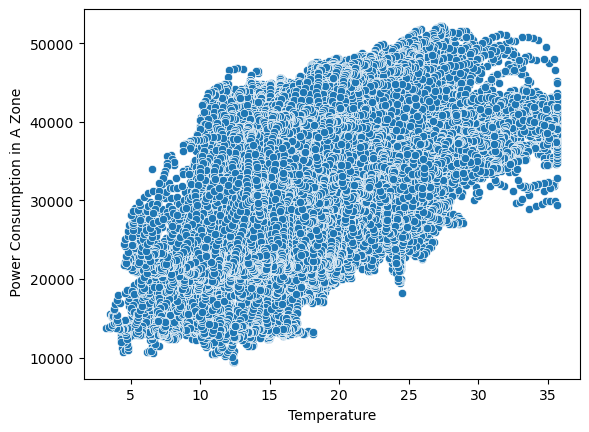

In [41]:
sns.scatterplot(x='Temperature', y=' Power Consumption in A Zone', data=df1)

<AxesSubplot:xlabel='Humidity', ylabel=' Power Consumption in A Zone'>

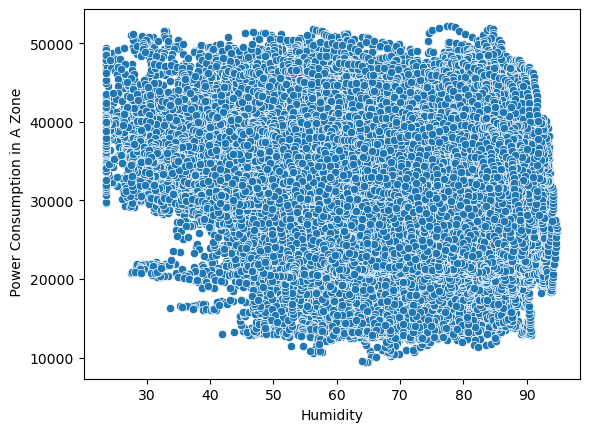

In [42]:
sns.scatterplot(x='Humidity', y=' Power Consumption in A Zone', data=df1)

<AxesSubplot:xlabel='diffuse flows', ylabel=' Power Consumption in A Zone'>

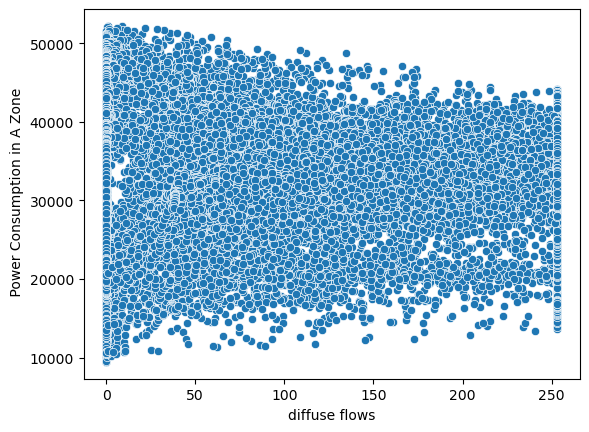

In [43]:
sns.scatterplot(x='diffuse flows', y=' Power Consumption in A Zone', data=df1)

<AxesSubplot:xlabel='general diffuse flows', ylabel='diffuse flows'>

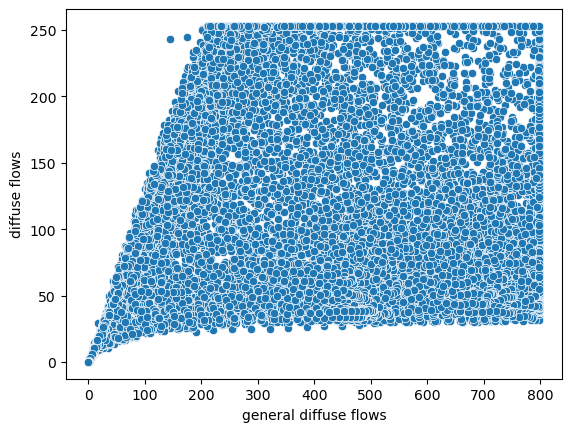

In [44]:
sns.scatterplot(x='general diffuse flows', y='diffuse flows', data=df1)

<AxesSubplot:xlabel='Temperature', ylabel='Humidity'>

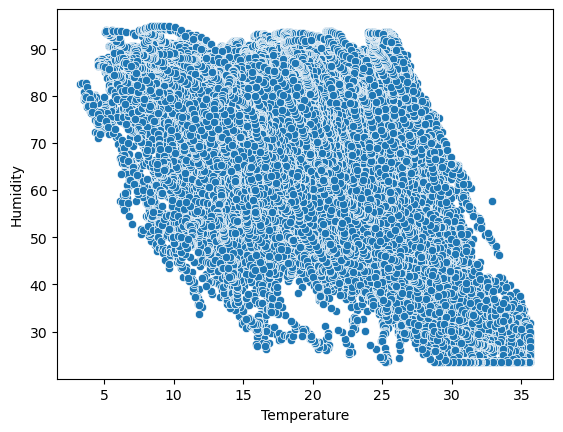

In [45]:
sns.scatterplot(x='Temperature', y='Humidity', data=df1)

<AxesSubplot:xlabel='general diffuse flows', ylabel=' Power Consumption in A Zone'>

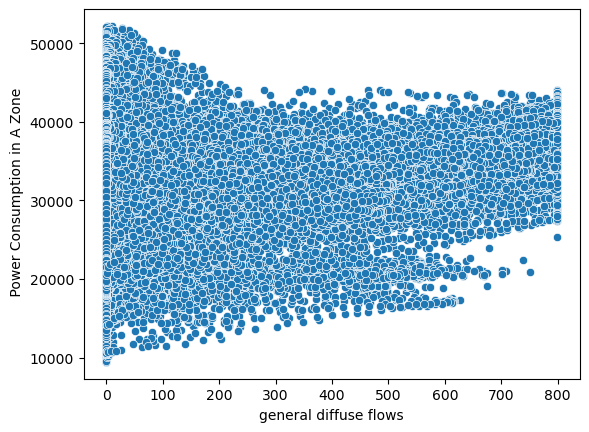

In [46]:
sns.scatterplot(x='general diffuse flows', y=' Power Consumption in A Zone', data=df1)

<AxesSubplot:xlabel='Wind Speed', ylabel=' Power Consumption in A Zone'>

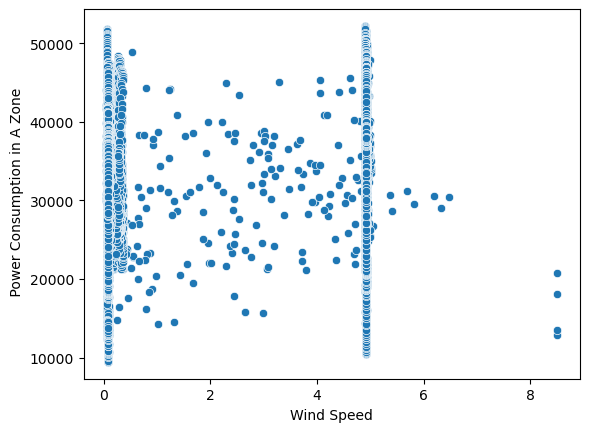

In [47]:
sns.scatterplot(x='Wind Speed', y=' Power Consumption in A Zone', data=df1)

In [48]:
df1.head()

Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   Air Quality Index (PM)  Cloudiness   Power Consumption in A Zone  
0                   158.0           1                   34055.69620  
1                   159.0           1                   29814.68354  
2                   151.0           1                   29128.10127  
3                   151.0           1                   28228.86076  
4                   154.0           1                   27335.69620

### Feature Engineering

In [49]:
df1['combined_diffuse_flows'] = df1['general diffuse flows'] + df1['diffuse flows']

In [50]:
df1.drop(['general diffuse flows','diffuse flows'], inplace=True, axis=1)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Temperature'),
  Text(1.5, 0, 'Humidity'),
  Text(2.5, 0, 'Wind Speed'),
  Text(3.5, 0, 'Air Quality Index (PM)'),
  Text(4.5, 0, 'Cloudiness'),
  Text(5.5, 0, ' Power Consumption in A Zone'),
  Text(6.5, 0, 'combined_diffuse_flows')])

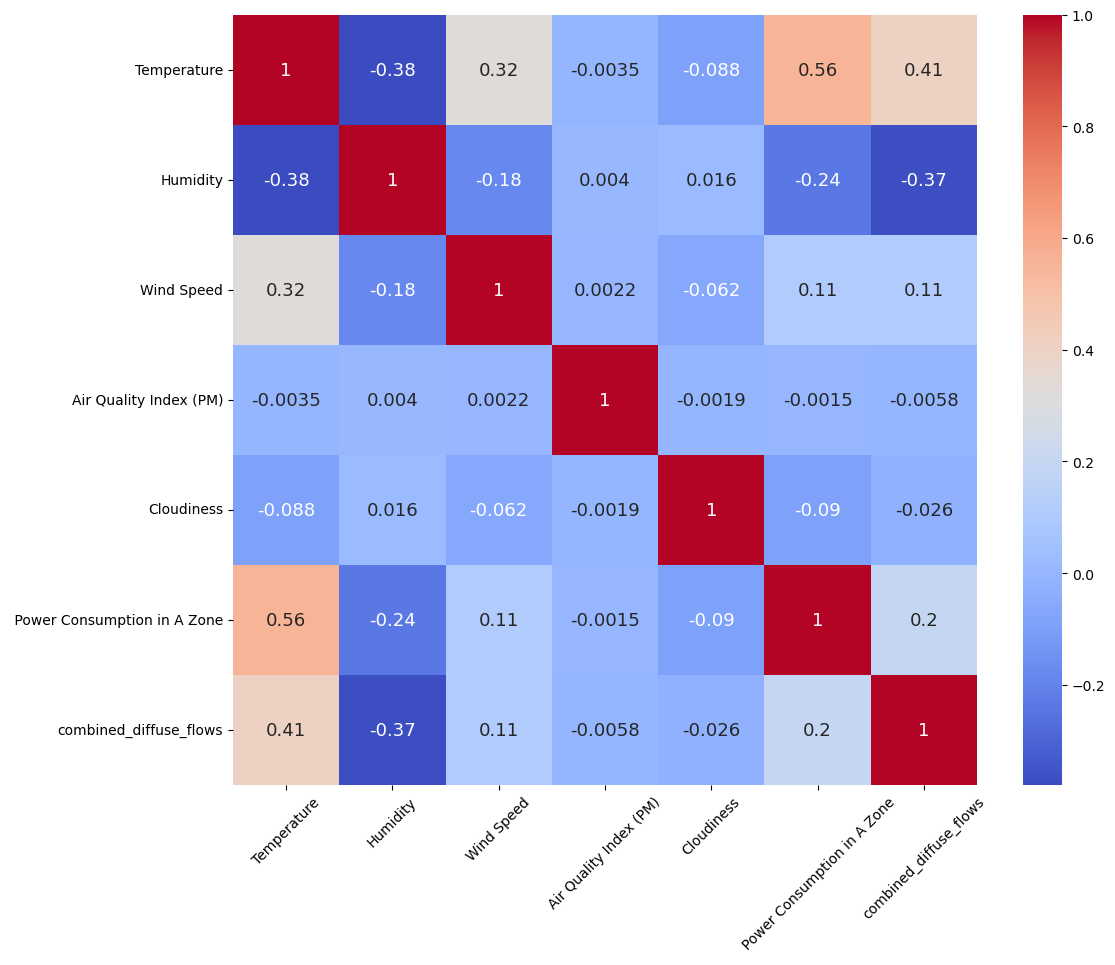

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(method='spearman'), annot=True, cmap='coolwarm',annot_kws={"size": 13})
plt.xticks(rotation=45)

### label Encoding

In [52]:
df1 = pd.get_dummies(df1, columns=['Cloudiness'], drop_first=True)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52145 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   52145 non-null  float64
 1   Humidity                      52145 non-null  float64
 2   Wind Speed                    52145 non-null  float64
 3   Air Quality Index (PM)        52145 non-null  float64
 4    Power Consumption in A Zone  52145 non-null  float64
 5   combined_diffuse_flows        52145 non-null  float64
 6   Cloudiness_1                  52145 non-null  uint8  
dtypes: float64(6), uint8(1)
memory usage: 4.9 MB


### Data Modeling

In [54]:
x=df1.drop(' Power Consumption in A Zone',axis=1)
y=df1[' Power Consumption in A Zone']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((41716, 6), (10429, 6))

### Scaling 

In [56]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 1. linear Regression 

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(scaled_X_train, y_train)
y_pred = lin_reg.predict(scaled_X_test)
linear_score = metrics.r2_score(y_test, y_pred)

In [58]:
np.random.seed(42)
random_state = 42
def Evaluation(X_test, y_test, model) :
    y_pred = model.predict(X_test)    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    msqe = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    n = len(y_test)  # Number of samples
    p = X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - ((1 - r2_score) * (n - 1)) / (n - p - 1)
   
    print("mean_absolute_error : ", mae)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2_score)
    print("Adjusted R2_score   : ", adjusted_r2)

In [59]:
Evaluation(scaled_X_test, y_test, lin_reg)

mean_absolute_error :  5327.371785657486
mean_squared_error  :  43507663.03064067
root_mean_absolute_error 6596.033886407852
R2_score            :  0.32558571586884766
Adjusted R2_score   :  0.32519745203227246


In [60]:
kfold=KFold(n_splits=10, shuffle= True)
result=cross_val_score(lin_reg, scaled_X_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.32692934 0.34259984 0.31338236 0.32541822 0.33247725 0.3299292
 0.34216037 0.32168728 0.30710117 0.3122809 ]
mean of all scores is :  0.3253965933423772


In [61]:
# ordinary_least_square_method

In [62]:
X1 = sm.add_constant(x)
y1 = df1[' Power Consumption in A Zone']
model = sm.OLS(y1, X1).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:      Power Consumption in A Zone   R-squared:                       0.326
Model:                                      OLS   Adj. R-squared:                  0.326
Method:                           Least Squares   F-statistic:                     4202.
Date:                          Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                                  10:55:55   Log-Likelihood:            -5.3240e+05
No. Observations:                         52145   AIC:                         1.065e+06
Df Residuals:                             52138   BIC:                         1.065e+06
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

## 2. Lasso Regression
​

In [63]:
lasso_cv = LassoCV(n_alphas=100, max_iter=1000, cv=10)
lasso_cv.fit(scaled_X_train, y_train)

LassoCV(cv=10)

In [64]:
lasso_cv.alpha_

4.475661736871863

In [65]:
Evaluation(scaled_X_test, y_test, lasso_cv)

mean_absolute_error :  5326.8751203399315
mean_squared_error  :  43505907.678375356
root_mean_absolute_error 6595.900823873518
R2_score            :  0.32561292566498345
Adjusted R2_score   :  0.3252246774932305


## 3. Ridge Regression 

In [66]:
alpha = 10**np.linspace(10,-2,100)*0.5
alpha

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [67]:
ridge_cv = RidgeCV(alphas=alpha, scoring="neg_mean_squared_error", cv=10)
ridge_cv.fit(scaled_X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [68]:
print( "alpha value : ", ridge_cv.alpha_)  

alpha value :  7.087370814634009


In [69]:
ridge_coef = ridge_cv.coef_
ridge_coef

array([5112.18433164,  149.16340964, -762.59723009,  -17.29729399,
       -557.78375337, -427.2366431 ])

In [70]:
Evaluation(scaled_X_test, y_test, ridge_cv)

mean_absolute_error :  5327.354970760096
mean_squared_error  :  43507591.67561422
root_mean_absolute_error 6596.028477471442
R2_score            :  0.3255868219463919
Adjusted R2_score   :  0.3251985587465913


## 4. Decision Tree

In [71]:
DTs_reg = DecisionTreeRegressor()
DTs_reg.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [72]:
Evaluation(scaled_X_test, y_test, DTs_reg)

mean_absolute_error :  4243.6649280153415
mean_squared_error  :  46952395.0048063
root_mean_absolute_error 6852.181769685208
R2_score            :  0.2721887672268466
Adjusted R2_score   :  0.271769762487196


In [73]:
Evaluation(scaled_X_train, y_train, DTs_reg)

mean_absolute_error :  0.0
mean_squared_error  :  0.0
root_mean_absolute_error 0.0
R2_score            :  1.0
Adjusted R2_score   :  1.0


### Cross_validation 

In [74]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(DTs_reg, scaled_X_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.27555849 0.19479018 0.29498686 0.22957169 0.20161709 0.22031445
 0.25960699 0.23807457 0.26814291 0.19548486]
mean of all scores is :  0.2378148082266089


In [75]:
param_grid = {
    
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4]}



Random_search= RandomizedSearchCV(estimator=DTs_reg, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=-1)


Random_search.fit(scaled_X_train, y_train)

best_params = Random_search.best_params_
print(best_params)
DT_model =Random_search.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'min_samples_split': 20, 'min_samples_leaf': 2, 'max_depth': 10}


In [76]:
Evaluation(scaled_X_test, y_test,DT_model)

mean_absolute_error :  4371.476311851056
mean_squared_error  :  34548646.054638214
root_mean_absolute_error 5877.809630690519
R2_score            :  0.46445984974577736
Adjusted R2_score   :  0.46415153647562524


In [77]:
Evaluation(scaled_X_train, y_train,DT_model)

mean_absolute_error :  4055.63042826294
mean_squared_error  :  29842019.44086016
root_mean_absolute_error 5462.784952829477
R2_score            :  0.5339331307903131
Adjusted R2_score   :  0.533866085279386


## 5.  Random Forest

In [78]:
random_forest = RandomForestRegressor(random_state=random_state)
random_forest.fit(scaled_X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
Evaluation(scaled_X_train, y_train, random_forest)

mean_absolute_error :  1301.2520466981496
mean_squared_error  :  3486915.8529356876
root_mean_absolute_error 1867.3285337443135
R2_score            :  0.9455420247950713
Adjusted R2_score   :  0.9455341908059748


In [80]:
Evaluation(scaled_X_test, y_test, random_forest)

mean_absolute_error :  3492.671663265558
mean_squared_error  :  24742999.16349366
root_mean_absolute_error 4974.233525227144
R2_score            :  0.61645763284612
Adjusted R2_score   :  0.6162368254960027


#### hyperparameter Tunning 

In [81]:
param_grid = {
    'n_estimators': [10,20,50],
    'max_depth': [2,4,5,10,20,30],
    'min_samples_split': [4,8,16,20],
    'min_samples_leaf': [2,4,8]}



Random_search= RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=10)


Random_search.fit(scaled_X_train, y_train)

best_params = Random_search.best_params_
rf_model =Random_search.best_estimator_
print(best_params)

{'n_estimators': 20, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_depth': 20}


In [82]:
Evaluation(scaled_X_train, y_train, rf_model)

mean_absolute_error :  2906.4344471402283
mean_squared_error  :  16266637.284539632
root_mean_absolute_error 4033.191947395962
R2_score            :  0.745950815198704
Adjusted R2_score   :  0.7459142692467797


In [83]:
Evaluation(scaled_X_test, y_test, rf_model)

mean_absolute_error :  3754.3515965409433
mean_squared_error  :  26846853.197060104
root_mean_absolute_error 5181.394908425733
R2_score            :  0.5838456947844295
Adjusted R2_score   :  0.5836061125707188


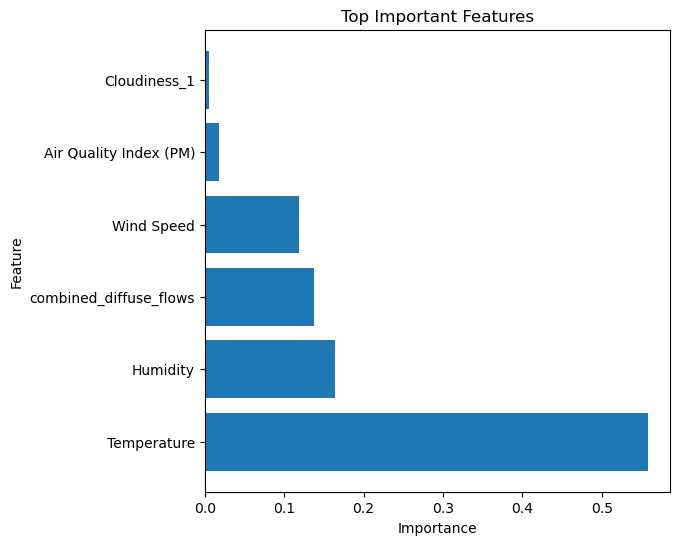

In [84]:
feature_importances =rf_model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_n = 10  
plt.figure(figsize=(6, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Important Features')
plt.show()

### Gradient boosting 

In [85]:
regression_model = GradientBoostingRegressor()
regression_model.fit(scaled_X_train, y_train)



GradientBoostingRegressor()

In [86]:
Evaluation(scaled_X_train, y_train, regression_model)


mean_absolute_error :  4725.576928491452
mean_squared_error  :  35977812.96109314
root_mean_absolute_error 5998.150795127874
R2_score            :  0.43810549815441524
Adjusted R2_score   :  0.4380246674701247


In [87]:
Evaluation(scaled_X_test, y_test, regression_model)

mean_absolute_error :  4761.867017711027
mean_squared_error  :  36529390.11857439
root_mean_absolute_error 6043.9548408781475
R2_score            :  0.4337562449811232
Adjusted R2_score   :  0.4334302554848545


#### Hyperparameter Tunning 

In [88]:
param_grid = {
    'n_estimators': [10,20,50,100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,2,3,5,10],
    'min_samples_split': [4,8,16,20,30],
    'min_samples_leaf': [1, 2, 4]}

random_search=RandomizedSearchCV(estimator=regression_model, param_distributions=param_grid,scoring='neg_mean_squared_error', cv=10)
random_search.fit(scaled_X_train, y_train) 
best_params=random_search.best_params_
gb_model =Random_search.best_estimator_
print(best_params)

{'n_estimators': 50, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.2}


In [89]:
Evaluation(scaled_X_train, y_train, gb_model)

mean_absolute_error :  2906.4344471402283
mean_squared_error  :  16266637.284539632
root_mean_absolute_error 4033.191947395962
R2_score            :  0.745950815198704
Adjusted R2_score   :  0.7459142692467797


In [90]:
Evaluation(scaled_X_test, y_test, gb_model)

mean_absolute_error :  3754.3515965409433
mean_squared_error  :  26846853.197060104
root_mean_absolute_error 5181.394908425733
R2_score            :  0.5838456947844295
Adjusted R2_score   :  0.5836061125707188


### Adaboosting Regrssor 

In [91]:
ada_model = AdaBoostRegressor()
ada_model.fit(scaled_X_train, y_train)

AdaBoostRegressor()

In [92]:
Evaluation(scaled_X_train, y_train, ada_model)

mean_absolute_error :  5318.189998884856
mean_squared_error  :  42206199.19044339
root_mean_absolute_error 6496.629833263042
R2_score            :  0.34083177055381675
Adjusted R2_score   :  0.34073694666984256


In [93]:
Evaluation(scaled_X_test, y_test, ada_model)

mean_absolute_error :  5316.26263542926
mean_squared_error  :  42349703.8262038
root_mean_absolute_error 6507.665005683974
R2_score            :  0.34353529471346134
Adjusted R2_score   :  0.34315736454346335


In [94]:
param_grid = {
    'n_estimators': [10,20,50, 100,200],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'loss': ['linear', 'square', 'exponential']
}
ada_model = AdaBoostRegressor()
ada_model.fit(scaled_X_train, y_train)
random_search=RandomizedSearchCV(estimator=ada_model, param_distributions=param_grid,scoring='neg_mean_squared_error', cv=10)
random_search.fit(scaled_X_train, y_train) 
best_params=random_search.best_params_
adabest_model =Random_search.best_estimator_
print(best_params)

{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.2}


In [95]:
Evaluation(scaled_X_train, y_train, adabest_model)

mean_absolute_error :  2906.4344471402283
mean_squared_error  :  16266637.284539632
root_mean_absolute_error 4033.191947395962
R2_score            :  0.745950815198704
Adjusted R2_score   :  0.7459142692467797


In [96]:
Evaluation(scaled_X_test, y_test, adabest_model)

mean_absolute_error :  3754.3515965409433
mean_squared_error  :  26846853.197060104
root_mean_absolute_error 5181.394908425733
R2_score            :  0.5838456947844295
Adjusted R2_score   :  0.5836061125707188


### XGB boosting  

In [97]:
xgb_model = XGBRegressor()
xgb_model.fit(scaled_X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [98]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5,10,20],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0,1.2],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2,0.3,0.4],
    'reg_lambda': [0.5, 1.0, 2.0,0.3,0.4],
    'random_state': [42]
}
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   scoring='neg_mean_squared_error', cv=10, n_iter=10)
random_search.fit(scaled_X_train, y_train)
best_params = random_search.best_params_
xgb_best_model = random_search.best_estimator_
print(best_params)


{'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.2, 'random_state': 42, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 20, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [99]:
Evaluation(scaled_X_train, y_train, xgb_best_model)

mean_absolute_error :  390.9916845758687
mean_squared_error  :  397028.250993751
root_mean_absolute_error 630.1017782816923
R2_score            :  0.9937992898136413
Adjusted R2_score   :  0.9937983978176423


In [100]:
Evaluation(scaled_X_test, y_test, xgb_best_model)

mean_absolute_error :  3959.9756728689954
mean_squared_error  :  29357782.973918095
root_mean_absolute_error 5418.282289980662
R2_score            :  0.544923656917889
Adjusted R2_score   :  0.5446616670830692
